# Mục tiêu bài toán đi xây dựng Model nhận diện biển báo giao thông
## link website dataset : https://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

https://docs.google.com/document/d/1rmn1XVXo9BqioZaVw5Jbeb1ORLH190Oo/edit

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data

https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy

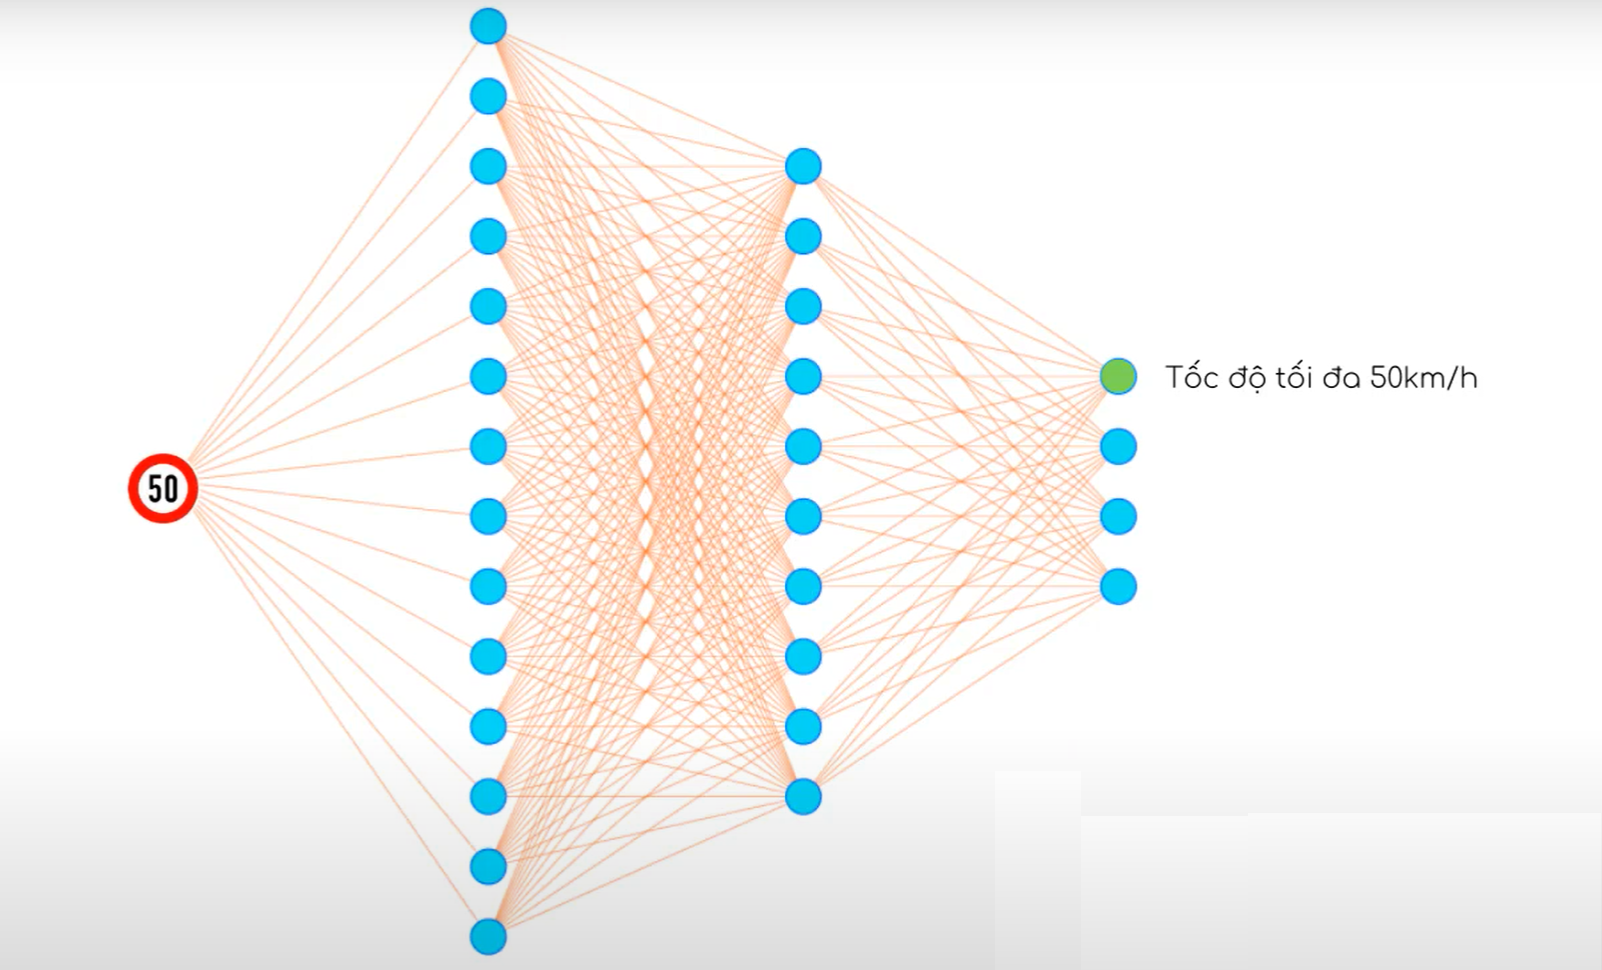

In [1]:
import tensorflow as tf

In [2]:
#!pip install tensorflow-gpu==2.0.rc

In [3]:
import tensorflow as tf
tf.__version__ # 2.17.0

'2.17.0'

In [4]:
# Nối Google Codlab với Google drive để làm nơi lưu trữ dữ liệu vì Coblab chỉ cho phép lưu trữ dữ liệu tối đa 24h
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pwd

'/content'

In [7]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [8]:
ls

 bk-old/                                                         test.p
 PredictTrafficSignsNet.ipynb                                    traffic-signs-data.zip
'ProtonX How to build Road Signals Classification Models.docx'   train.p
'ProtonX How to build Road Signals Classification Models.gdoc'   valid.p


In [9]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
# !pip install wget

In [10]:
# import wget
# wget.download(link)

In [11]:
data = "./"

In [12]:
# !unzip -q traffic-signs-data.zip -d $data

In [13]:
# Tạo đương đãn của các file trên
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [14]:
import pickle # dưa muối


In [15]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [16]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [17]:
with open(test_link, mode="rb") as f:
   test = pickle.load(f)

# Step 0 : Trước khi Train / tiền xử lý data --> hãy phân tích data có những gì ?

https://github.com/gstearmit/traffic-sign-recognition/blob/master/README.md

### 1. data phân bổ như thế nào ?
### 2. input /oupt ntn ?

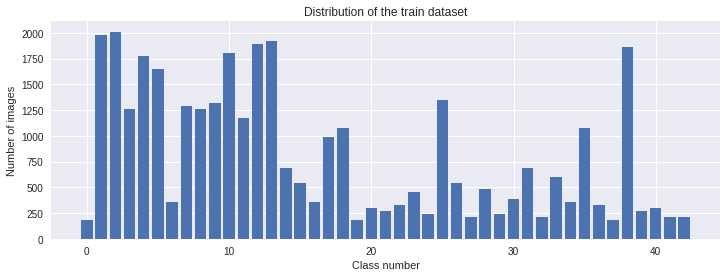

### Giải thích lý do vì sao lại chia thành 3 phần : Train , Test , Valid theo sơ đồ sau:

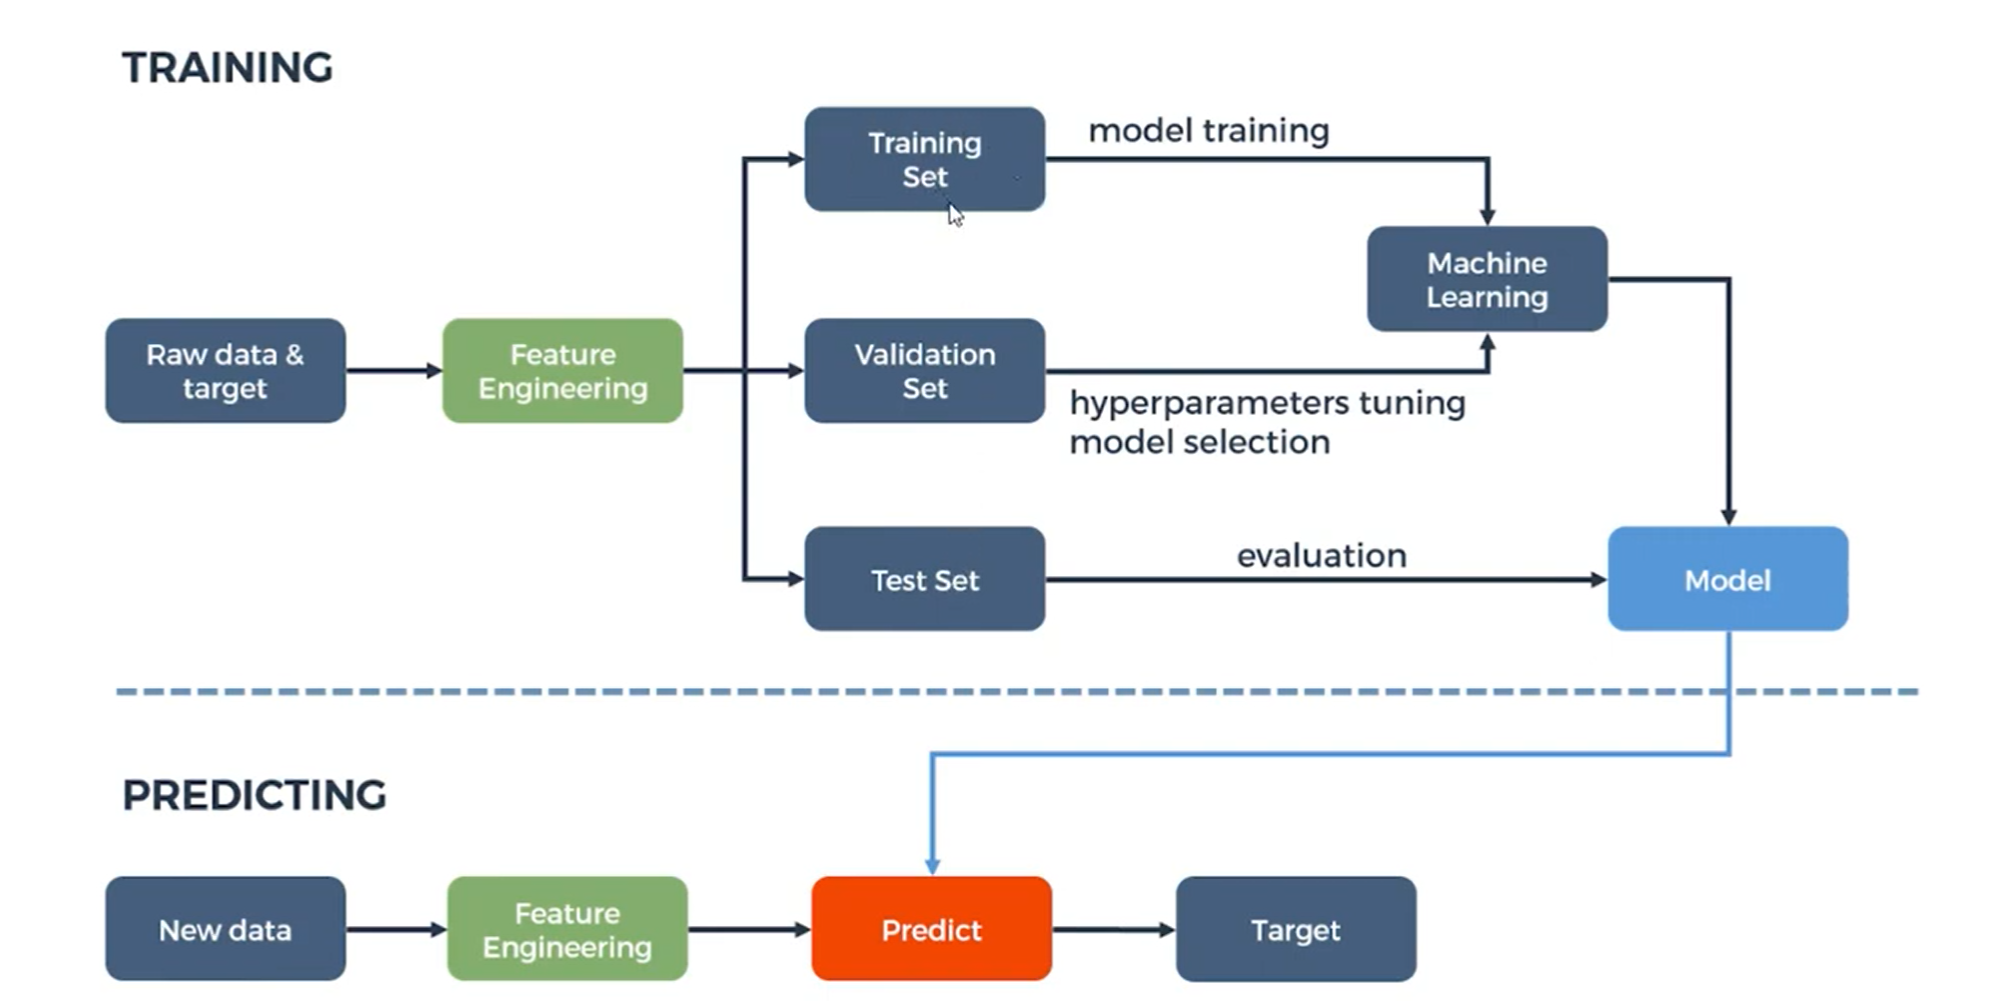

In [18]:
# Kiểm tra giá Trị
train  # labels là các nhãn và features là các ảnh
       # 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
       # 'features': array([[[[ 28,  25,  24],

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [19]:
trainX = train["features"]
trainY = train["labels"]

In [20]:
classNames_output_labels = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

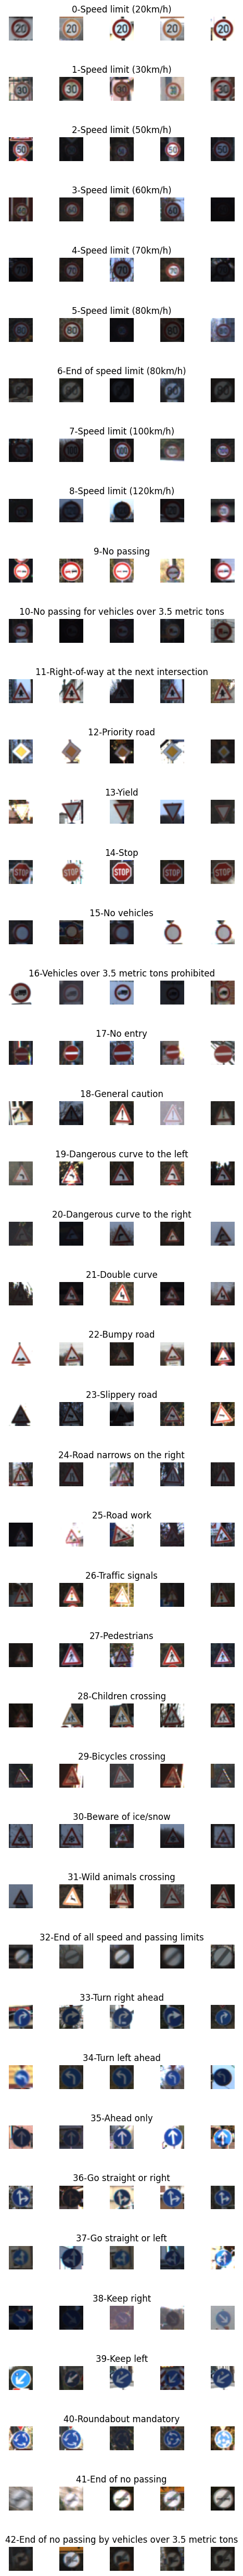

In [21]:
import matplotlib.pyplot as plt
import random

data_classNames = classNames_output_labels # pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes): # Changed to iterate through range of classes
      x_selected = trainX[trainY == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + "-" + data_classNames[j]) # Access dictionary value directly
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


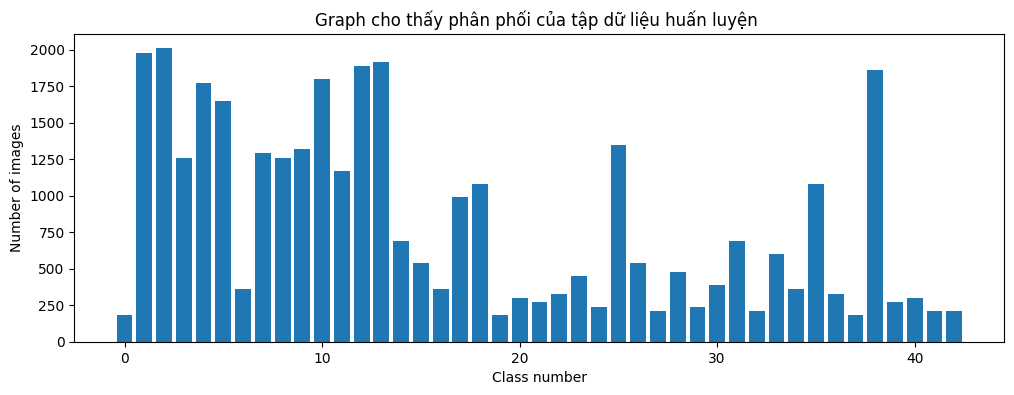

In [22]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Graph cho thấy phân phối của tập dữ liệu huấn luyện ") # Distribution of the train dataset
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [23]:
# Kiểm tra số chiều của trainX , trainY
trainX.shape  #  (34799, 32, 32, 3) : mỗi một bức ảnh sẽ là cỡ 32x32x3
              #  Mỗi một bức ảnh có 3 lớp RGB và mỗi lớp có chiều là 32x32
              # vậy con số 34799 là gì ?  --> nó chính là số lượng ảnh
              # (34799, 32, 32, 3) : khi 34 ngàn bức ảnh ghép vào nhau --> nó sẽ trở thành ma trận 4 chiều

(34799, 32, 32, 3)

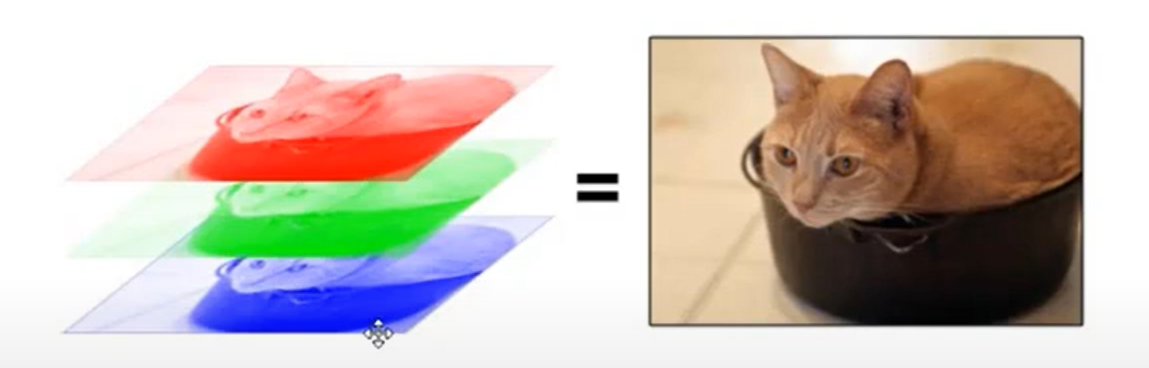

In [24]:
# Vậy giờ ta muốn chỉ lấy ra một bức ảnh thôi ta làm như sau:  ### dựa vào index để lấy ra

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)
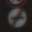

In [25]:
trainX[0] # Chính là bức ảnh số 0

In [26]:
# Kiểm tra số chiều của bức ảnh trên
trainX[0].shape # (32, 32, 3) : Chưng minh ta nói một ảnh có số chiều là 3 chiều

(32, 32, 3)

In [27]:
# Chúng ta sẽ sử dụng một thư viện để hiển thị lên các bức ảnh này matplotlib
import matplotlib.pyplot as plt


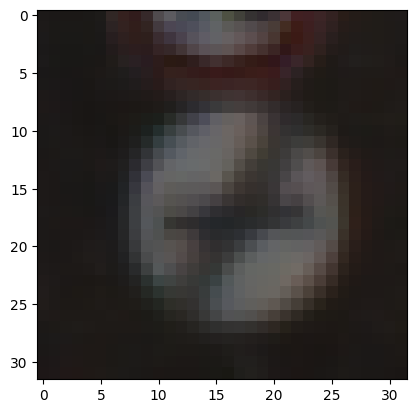

In [28]:
plt.imshow(trainX[0])

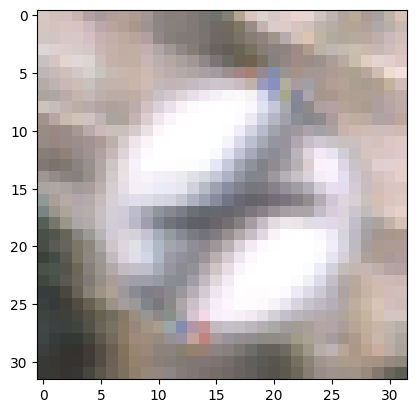

In [29]:
plt.imshow(trainX[50])

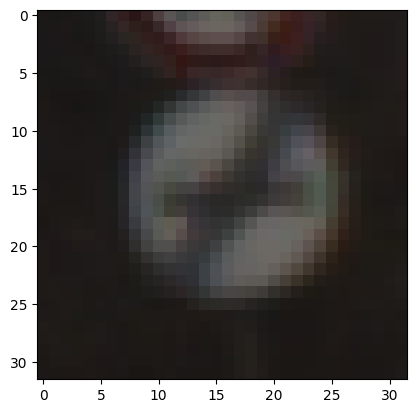

In [30]:
plt.imshow(trainX[1])

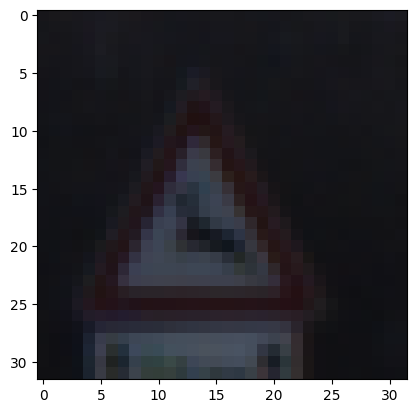

In [31]:
plt.imshow(trainX[250])

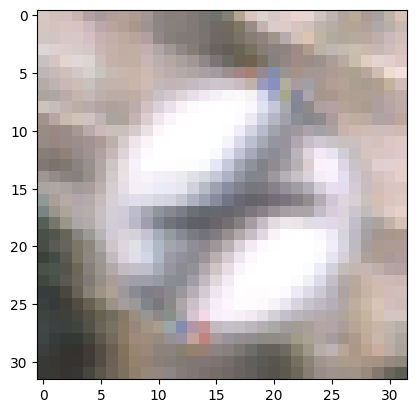

In [32]:
# Giờ muốn xem labels của nó là gì ?
plt.imshow(trainX[50])

In [33]:
trainY[50] # Hiển thị nhãn / labels

41

In [34]:
# Hiển thị tên nhãn  https://docs.google.com/document/d/1KlavfVAerQFibtuNL7HEZUitXwRK4oNbiYXd0pRIzjQ/edit

In [35]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [36]:
classNames[trainY[50]]

'End of no passing'

In [37]:
# Quan sát thấy tất cả các ảnh giống nhau và đều được đặt cạnh nhau --> do vậy có ảnh hưởng tới quá trình học và Train Model
# Do vậy cần tráo vị trí các ảnh để không ảnh hưởng tới quá trình học Model

In [38]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

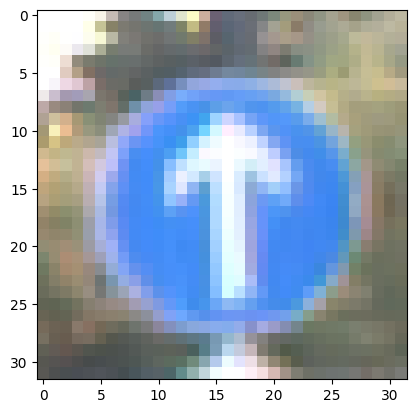

In [39]:
# Kiểm tra lại xem đã trộn được chưa
plt.imshow(trainX[0])

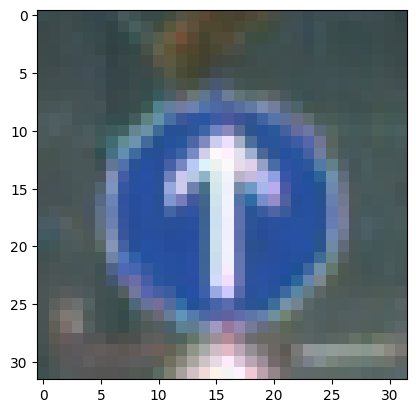

In [40]:
plt.imshow(trainX[250])

In [41]:
classNames[trainY[250]]

'Ahead only'

In [42]:
# Tạo tiếp Tập data validX , validY
validX = valid["features"]
validY = valid["labels"]

In [43]:
testX = test["features"]
testY = test["labels"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [163, 163, 145],
        [179, 174, 153],
        [189, 184, 161]],

       [[255, 255, 255],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [179, 175, 155],
        [189, 185, 162],
        [185, 179, 153]],

       [[255, 255, 252],
        [255, 255, 247],
        [255, 255, 254],
        ...,
        [187, 181, 153],
        [179, 176, 152],
        [179, 173, 152]],

       ...,

       [[ 96,  96,  85],
        [ 98,  91,  85],
        [100,  87,  80],
        ...,
        [110, 112,  95],
        [105, 107,  92],
        [ 94, 101,  87]],

       [[ 87,  87,  81],
        [ 86,  84,  82],
        [ 86,  81,  81],
        ...,
        [104, 105,  88],
        [107, 108,  94],
        [107, 111,  98]],

       [[ 89,  88,  84],
        [ 78,  80,  80],
        [ 74,  79,  81],
        ...,
        [124, 121, 113],
        [113, 113, 106],
        [122, 123, 119]]], dtype=uint8)
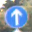

In [44]:
# Trước khi chuẩn hóa
trainX[0]

In [45]:
#### Notes valid, test : không dùng để training , mà valid chỉ dùng để validtion khi đang trainning thôi
####       test : Chi dùng test khi trainning xong
#### Nên toàn bộ không phải thực hiện tráo

In [46]:
### Phải thực hiện chuẩn hóa các data Poit xuống dưới > 0 và < 1 bằng cách :
trainX = trainX.astype("float") / 255.0  # vì mỗi pixel chạy từ 0 - 255
# Tương tự bộ kia
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [47]:
# Sau khi chuẩn hóa
trainX[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.63921569, 0.63921569, 0.56862745],
        [0.70196078, 0.68235294, 0.6       ],
        [0.74117647, 0.72156863, 0.63137255]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.70196078, 0.68627451, 0.60784314],
        [0.74117647, 0.7254902 , 0.63529412],
        [0.7254902 , 0.70196078, 0.6       ]],

       [[1.        , 1.        , 0.98823529],
        [1.        , 1.        , 0.96862745],
        [1.        , 1.        , 0.99607843],
        ...,
        [0.73333333, 0.70980392, 0.6       ],
        [0.70196078, 0.69019608, 0.59607843],
        [0.70196078, 0.67843137, 0.59607843]],

       ...,

       [[0.37647059, 0.37647059, 0.33333333],
        [0.38431373, 0.35686275, 0.33333333],
        [0.39215686, 0

In [48]:
#### Giải thích việc chuẩn hóa sẽ làm cho việc ảnh hưởng giưa các data point lên việc training tương đồng nhau nhiều hơn
##### Ví dụ : có 2 data point lần lượt là 255 và 1 thì sức ảnh hưởng của 255 sẽ lớn hơn lên việc training rất là lớn
### Khi chuẩn hóa xong thì các giá trị sẽ được thu hẹp lại là chỉ > 0 hoặc < 1
# Do vậy sau khi chuẩn hóa sẽ không ảnh hưởng của từng data point lên quá trình training  --> nên kết quả training sẽ tương đồng nhau nhiều hơn.
# Tránh được sự thiên vị
# Ví dụ  : nếu giữ 255 : kq sẽ thiên vị về data point có giá trị là 255 ---> đó là lý do chính phải chuẩn hóa lại data point ảnh


In [49]:
# Chuẩn Hóa data nhãn labels  Vì nhãn bây giờ là các số còn đầu ra của mạng là 1 vector có chiều 43x1
# ---> Tại sao lại có số 43 là vì classNames = {0...42} có tất cả là 43 nhãn/ label phần tử
# ---> nên Trong one-hot encoding, các nhãn được biểu diễn bằng các vector nhị phân với giá trị 1 ở vị trí của nhãn đó và 0 ở tất cả các vị trí khác.
#      Điều này giúp tránh sự nhầm lẫn giữa các nhãn và không tạo ra mối quan hệ thứ tự giả mạo giữa chúng
# https://chatgpt.com/share/66f0f744-caa8-800d-9381-ed845de452d9

# Nên giờ phải dùng 1 function để chuyển nhãn từ 1 số về dạng one hot , để tương ứng với vector đâu ra

#### là mạng nơ ron ta định xây dựng :
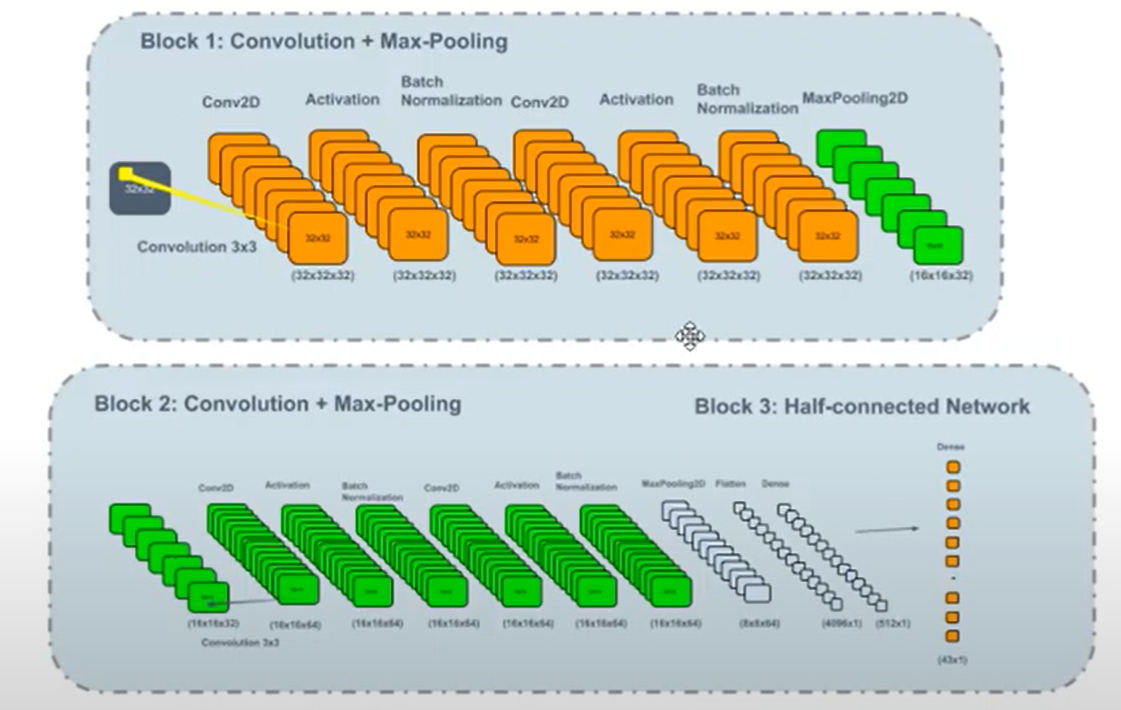

In [50]:
from sklearn.preprocessing import LabelBinarizer

In [51]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)

In [52]:
# Tiếp cho nhãn valid , test
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)

In [53]:
# Kiểm tra sau Chuẩn hóa nhãn
valid["labels"][0] # là số 41 chính là số index của các array này , còn lại tất cả các phần tử trong anrray đều = 0 hết

41

In [54]:
validY[0] # tất cả đều là 0 --> đó chính là ý nghĩa của việc chuyển về One hot  --> Đúng vị trí thứ từ 0 ..41 được đánh số là 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
valid["labels"][250] # 23
validY[250]          # array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Tất các các bước trên là tiền xử lý dữ liệu  (Data Processing) ==> đã xong**
## **Bước tiêp theo là Xây dựng mạng**

###  **Bước xây dựng mô hình mạng nơ ron thân kinh để phân loại biển báo giao thông**

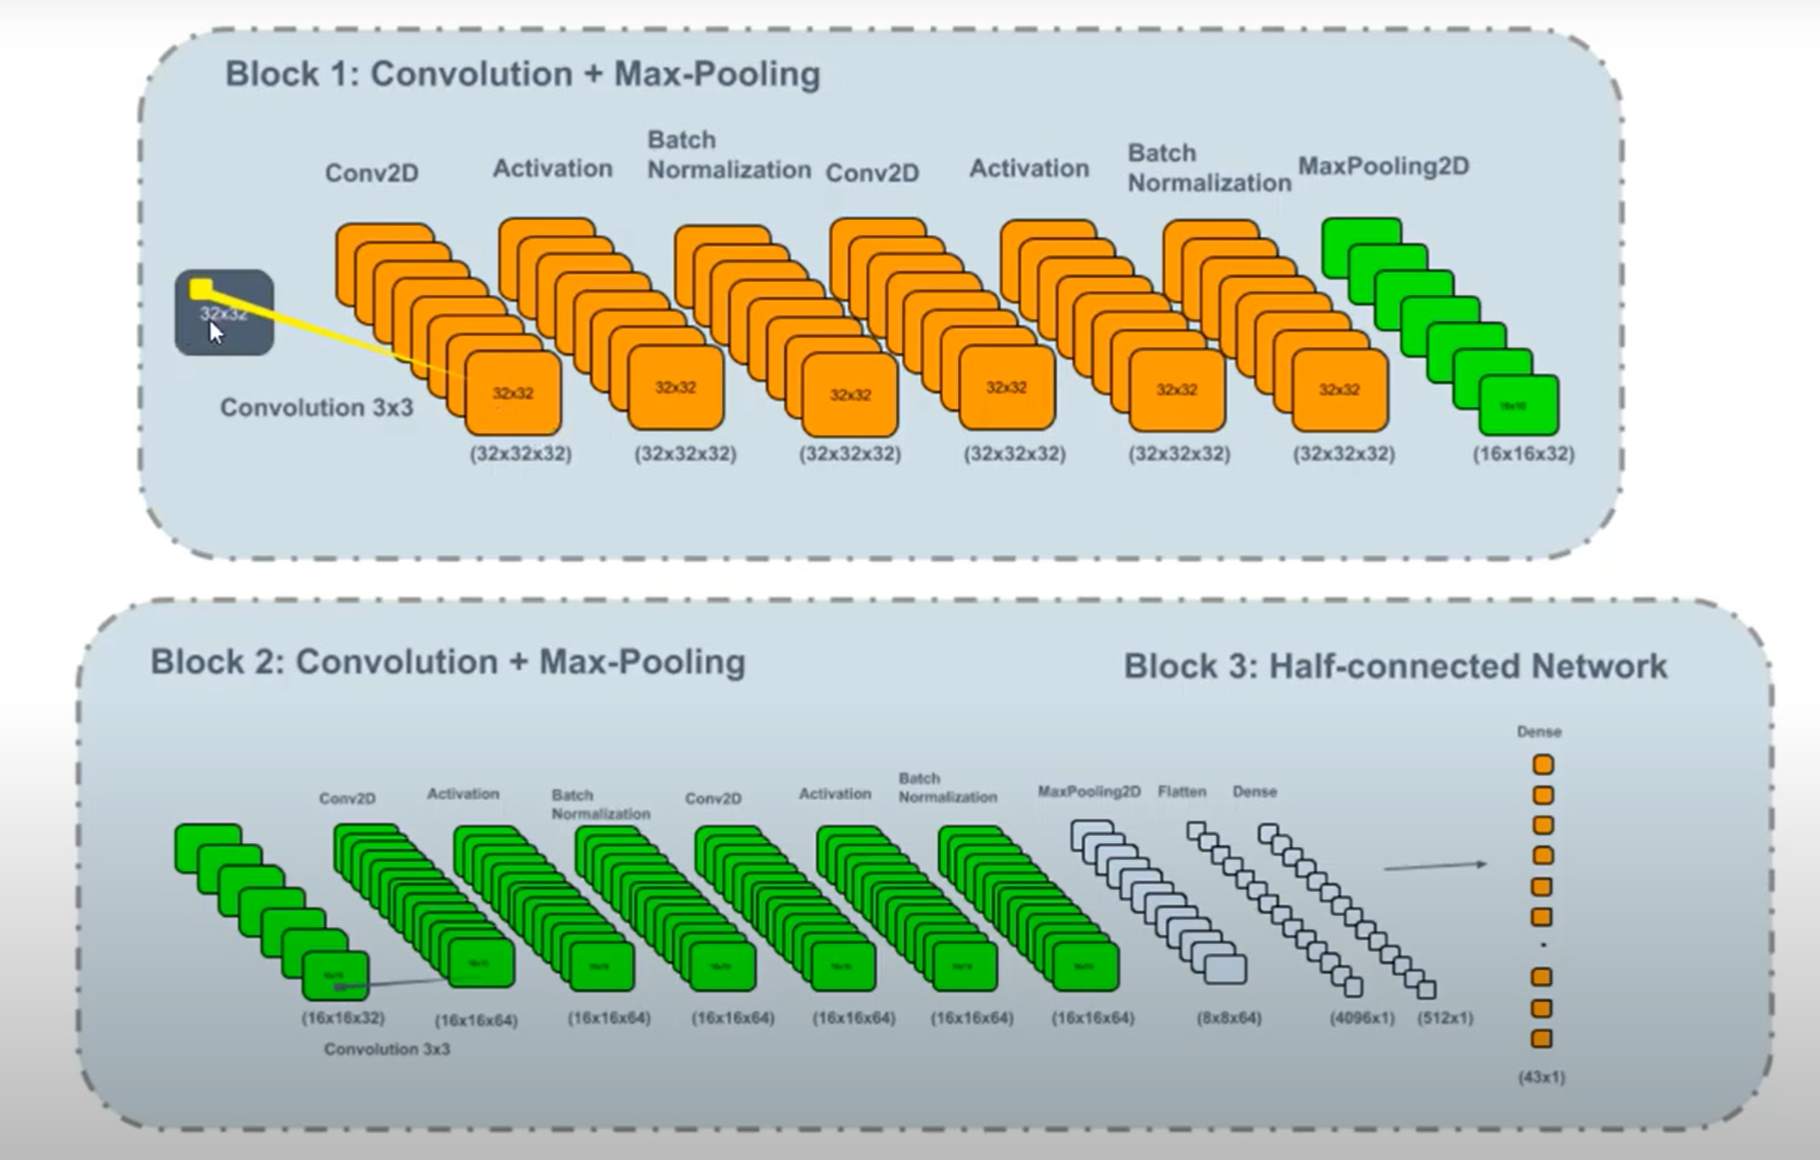

## có 1 loạt danh sách các API cần dùng để xây dựng mạng nỏ ron

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [57]:
# Khởi tạo model
model = Sequential()

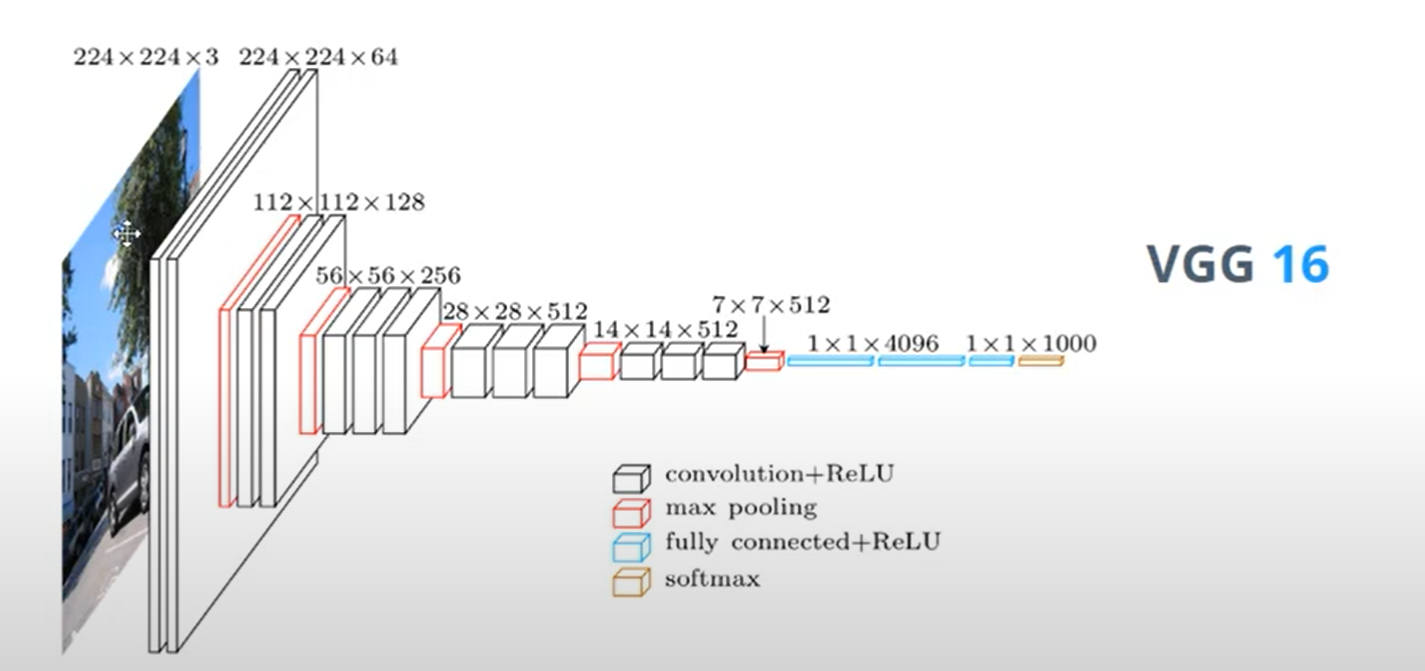

Chúng ta thực hiện các phép tích chập, phép max-pooling và sau đó đưa vào mạng nửa kết nối đầy đủ (half fully-connected network) và giảm chiều lớp xuống đúng bằng số lượng class.

In [58]:
width = 32
height = 32
classes = 43

In [59]:
shape = (width,height, 3)

In [60]:
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary() # Param ví dụ 896 thì có 896 param cần phải học ở mỗi lớp

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Block 1
# Tạo lớp Convolution 3x3
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))

model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [63]:
# Block 2
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

Đưa vào mạng Neuron không kết nối đầy đủ vì có sử dụng Dropout.

In [64]:
model.add(Flatten())
model.add(Dense(512))     # Tạo lớp Dense (512x1)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes)) # Tạo lớp Densev: Giảm lớp xuống còn (43x1)

In [65]:
model.add(Activation("softmax"))  # Tạo lớp softmax để nhận diện xem Input thuộc lớp nào trong 43 lớp

In [66]:
# Kiểm tra lại cấu trúc của mô hình trước khi train.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,197,355 (8.38 MB)

 Trainable params: 2,195,947 (8.38 MB)

 Non-trainable params: 1,408 (5.50 KB)

#### 5. Tăng cường data khi train

In [67]:
# Ta có thể xoay, zoom to, thay đổi kích cỡ để có nhiều đặc trưng hơn mà vẫn giữ nguyên nhãn
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

Chỉ số decay nhằm điều chỉnh learning rate. Đọc thêm ở đây https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

In [68]:
# Khởi tạo param tốc độ học
learning_rate = 1e-2    # ~ learning_rate = 0.01
batch_size = 64
num_epochs = 30         # Accuracy: 74% within 30 epochs

In [69]:
# use learning_rate instead of lr
opt = SGD(learning_rate=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [70]:
# Use fit method instead of fit_generator
print("Start Training...")
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY),
                       steps_per_epoch=trainX.shape[0] // batch_size, epochs=num_epochs, verbose=1)

Start Training...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.1378 - loss: 3.7207 - val_accuracy: 0.2968 - val_loss: 2.9815
Epoch 2/30
  1/543 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3281 - loss: 2.4884

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 2.4884 - val_accuracy: 0.2932 - val_loss: 2.9919
Epoch 3/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.3888 - loss: 2.0749 - val_accuracy: 0.4079 - val_loss: 1.9709
Epoch 4/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 1.1897 - val_accuracy: 0.4229 - val_loss: 1.8789
Epoch 5/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6139 - loss: 1.1789 - val_accuracy: 0.6952 - val_loss: 0.9711
Epoch 6/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7031 - loss: 0.7342 - val_accuracy: 0.7102 - val_loss: 0.9474
Epoch 7/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.7736 - loss: 0.6824 - val_accuracy: 0.7515 - val_loss: 0.8240
Epoch 8/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9531 - loss: 0.2420 - val_accuracy: 0.7469 - val_loss: 0.8438
Epoch 9/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.8566 - loss: 0.4286 - val_accuracy: 0.8

# Đào tạo và phân tích Accuracy / Loss

https://github.com/gstearmit/traffic-sign-recognition/blob/master/README.md

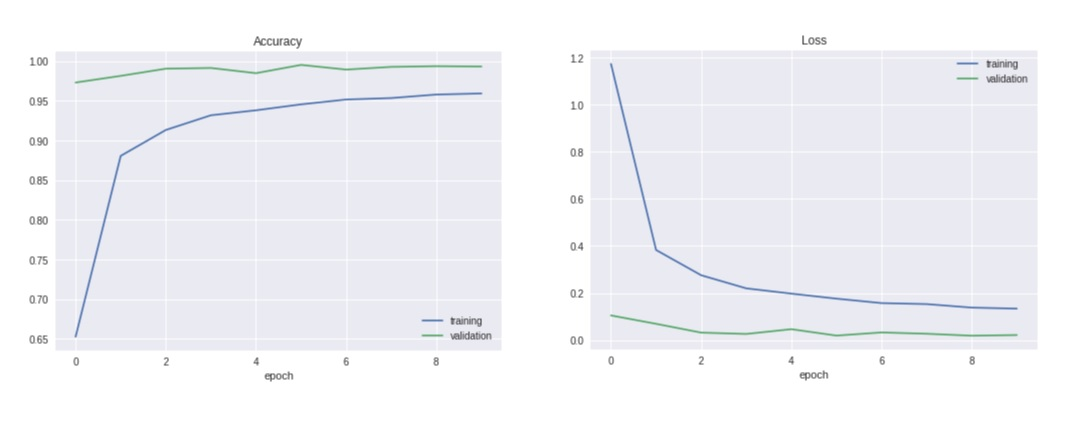

Text(0.5, 0, 'epoch')

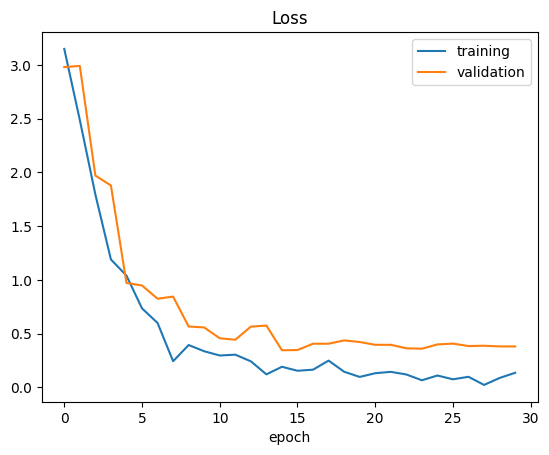

In [71]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

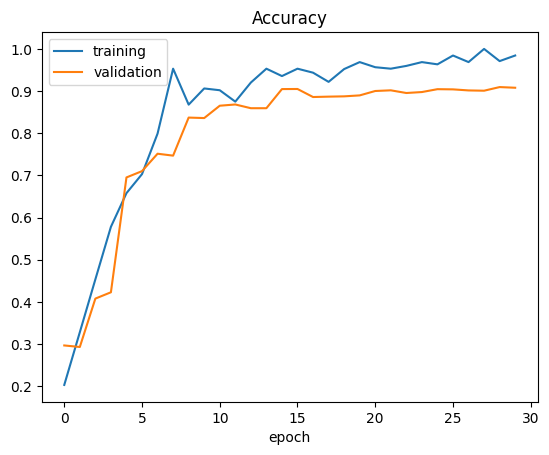

In [72]:
plt.plot(H.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(H.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [73]:
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical # Use tensorflow.keras.utils to import to_categorical

In [74]:
y_train = to_categorical(trainY, 43)
y_val = to_categorical(validY, 43)
y_test = to_categorical(testY, 43)

In [75]:
X_test, Y_test = test['features'], test['labels']

In [76]:

# # Apply one-hot encoding to the test labels
# Y_test = to_categorical(y_test, 43)

# # Get the number of variables before evaluation
# before = len(tf.config.experimental.list_variables())

# score = model.evaluate(X_test, Y_test, verbose = 0)

# # Get the number of variables after evaluation
# after = len(tf.config.experimental.list_variables())

# print('Test score: ', score[0])
# print('Test Accuracy: ', score[1])

# if after > before:
#     print(f"New variables created during evaluation: {after - before}")

In [77]:
## Graphical Representation of the accuracy of the model over the epochs
## Biểu diễn bằng đồ họa về độ chính xác của mô hình qua các thời đại
import seaborn as sns

<Axes: >

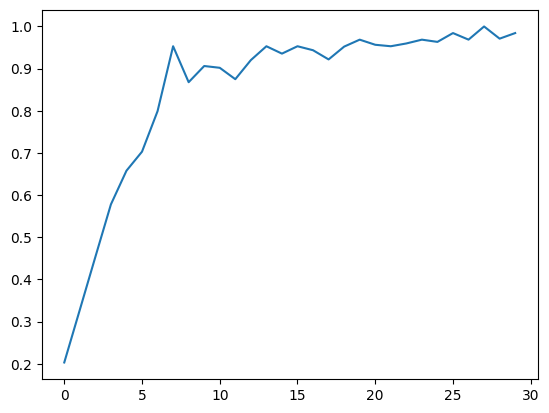

In [78]:
sns.lineplot(H.history['accuracy'])

#### 6. Lưu model và load lại nhằm inference

Lưu lại model sau khi train xong.

In [79]:
model.save('predictTrafficSignsNet.h5')  # h5 là định dạng keras

In [80]:
model.save("predictTrafficSignsNet.keras")

# **Trong notebook này, tôi đã train trên Google Colab và sử dụng lại pretrained-model**

In [81]:
import tensorflow as tf
import numpy as np

In [82]:
model = tf.keras.models.load_model("predictTrafficSignsNet.h5")

In [83]:
result = model.predict(np.array(testX[0:1]/255.0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [84]:
result

array([[4.4224933e-03, 3.6953058e-02, 4.5228811e-05, 2.6763819e-02,
        2.2267986e-03, 1.9026113e-03, 1.1350846e-04, 3.1179145e-03,
        6.2321727e-05, 1.5643075e-04, 1.0316516e-05, 2.4427960e-04,
        8.3448915e-03, 3.3504949e-03, 8.9673471e-05, 4.0667848e-05,
        1.6060219e-05, 4.9858038e-05, 1.0742503e-02, 6.6181892e-01,
        3.2092082e-06, 3.0758051e-06, 2.9475376e-02, 1.0222862e-04,
        1.2385747e-05, 2.2787829e-04, 1.4282981e-04, 6.1678447e-06,
        3.8781244e-04, 1.1670845e-04, 2.2272466e-06, 1.2390470e-02,
        1.9082760e-02, 5.0416011e-02, 1.3460156e-04, 1.4904218e-02,
        9.6677050e-02, 2.8053028e-04, 3.7686151e-04, 4.3289005e-03,
        6.5931724e-03, 3.3957185e-03, 4.6802044e-04]], dtype=float32)

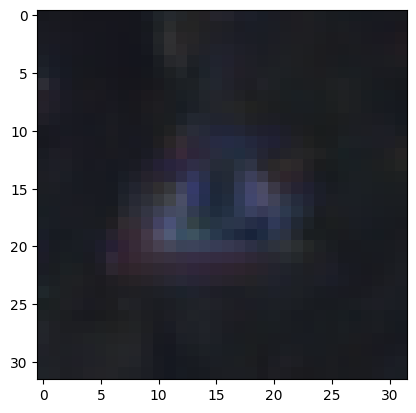

In [85]:
plt.imshow(testX[50], cmap=plt.cm.binary)

In [86]:
predicted_label = np.argmax(result)

In [87]:
classNames[predicted_label]

'Dangerous curve to the left'

In [88]:
# validate tiếp
final = np.argmax(result)

In [89]:
final

19

In [90]:
final = classNames[final]

In [91]:
final

'Dangerous curve to the left'

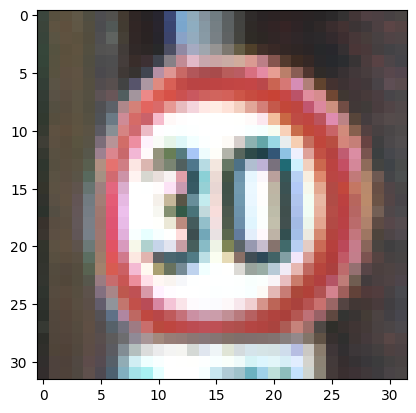

In [92]:
plt.imshow(test["features"][1])

Như bạn đã thấy với một ảnh ngãu nhiên ta đã dự đoán đúng ý nghĩa của biển báo.

Vậy là tôi đã chia sẻ xong cách xây dựng một deep learning model để nhận biết biển báo giao thông. Chia sẻ bài viết này nếu bạn thấy hữu ích nhé.

Thân.